#**Walmart Business Case - Confidence Interval and CLT**

#**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


#**Problem Statement:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

#**Column Profiling**


* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount

#**Importing Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from scipy.stats import norm
!gdown 1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1

Downloading...
From: https://drive.google.com/uc?id=1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1
To: /content/walmart-data.csv
100% 23.0M/23.0M [00:00<00:00, 180MB/s]


In [ ]:
# Loading the dataset -
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
data.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
97760,1003169,P00274042,M,51-55,0,C,2,0,1,19598
378227,1004183,P00171742,M,26-35,1,B,4+,0,5,3692
244745,1001694,P00028842,M,26-35,12,B,3,1,6,20664
87270,1001451,P00109242,M,36-45,20,B,0,0,6,20392
320160,1001320,P00289242,M,26-35,4,A,2,0,1,7833
357959,1001150,P00051542,F,26-35,20,A,1,0,8,4127
421183,1004796,P00311542,M,36-45,7,A,4+,1,5,8589
214199,1003087,P00136442,F,0-17,1,B,0,0,14,14746
130764,1002073,P00186942,F,18-25,4,B,4+,0,5,5349
66520,1004179,P00086742,F,36-45,20,C,3,1,5,7084


In [ ]:
data.shape

(550068, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
data.isnull().sum().sum()

0

#**Unique Attributes and Value Counts**

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data['User_ID'].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002690,7
1002111,7
1005810,7


In [ ]:
data['User_ID'].nunique()

5891

In [ ]:
data['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1


In [ ]:
data['Product_ID'].nunique()

3631

#**Visualizing the data**

In [ ]:
gender=data['Gender'].value_counts()
gender

,count
Gender,
M,414259
F,135809


<BarContainer object of 2 artists>

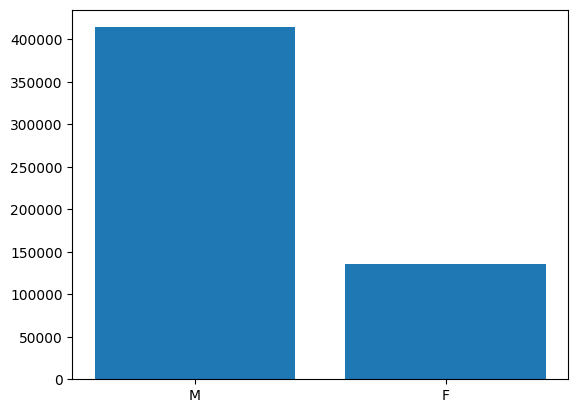

In [ ]:
x_bar=gender.index
y_bar=gender
plt.bar(x_bar,y_bar)

On the whole from the given data, 75% are males and rest are females.

In [ ]:
age=data['Age'].value_counts()

<BarContainer object of 7 artists>

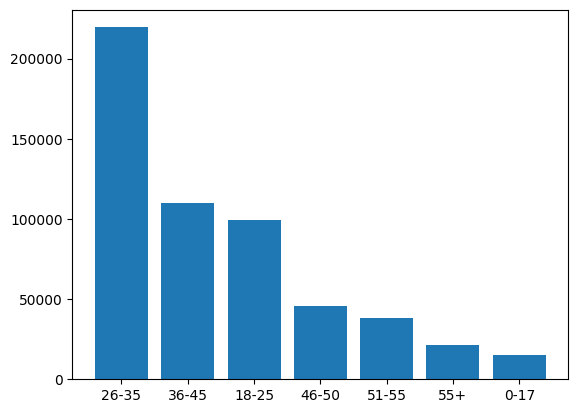

In [ ]:
x_bar=age.index
y_bar=age
plt.bar(x_bar,y_bar)

Most of the Walmart customers are from the age range between 26 and 35.

<BarContainer object of 21 artists>

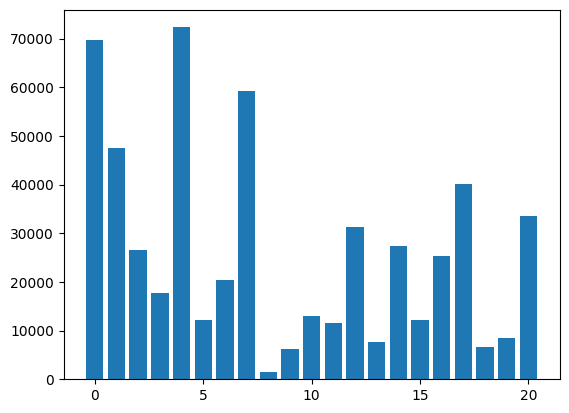

In [ ]:
occ=data['Occupation'].value_counts()
x_bar=occ.index
y_bar=occ
plt.bar(x_bar,y_bar)

<BarContainer object of 3 artists>

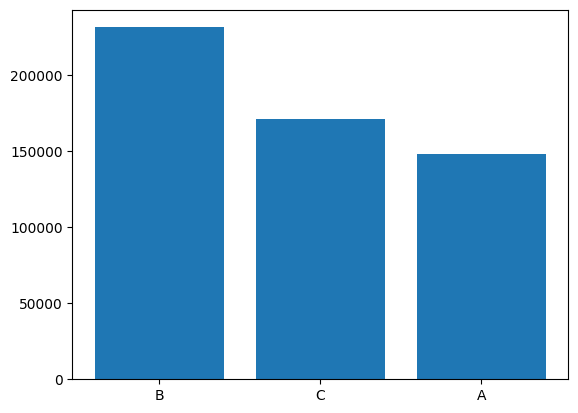

In [ ]:
city_cat=data['City_Category'].value_counts()
x_bar=city_cat.index
y_bar=city_cat
plt.bar(x_bar,y_bar)

The Customers from B category cities are more followed C and A.

<BarContainer object of 5 artists>

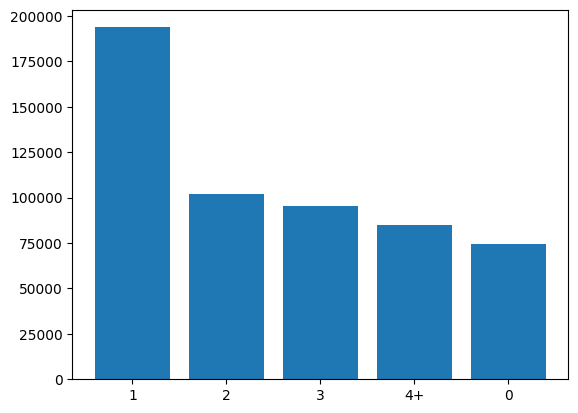

In [ ]:
city_stay=data['Stay_In_Current_City_Years'].value_counts()
x_bar=city_stay.index
y_bar=city_stay
plt.bar(x_bar,y_bar)

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

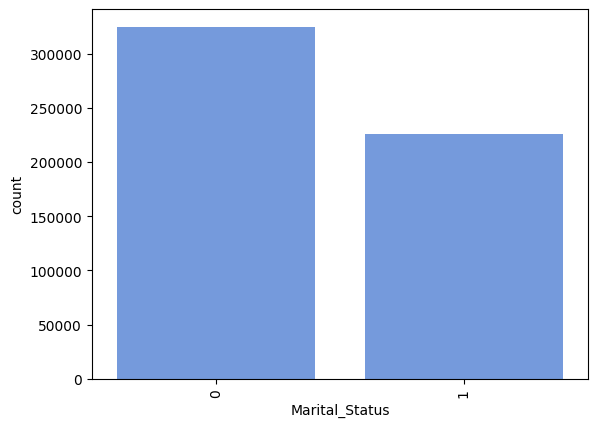

In [ ]:
sns.countplot(x='Marital_Status', data=data, color='cornflowerblue')
plt.xticks(rotation=90)

<Axes: xlabel='Purchase', ylabel='Density'>

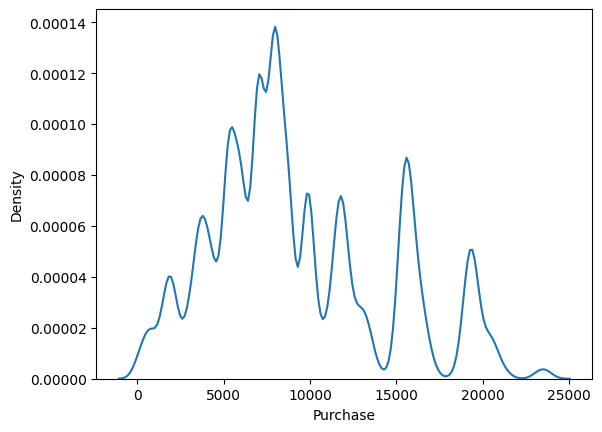

In [ ]:
sns.kdeplot(data['Purchase'])

#**Bivariate Analysis**

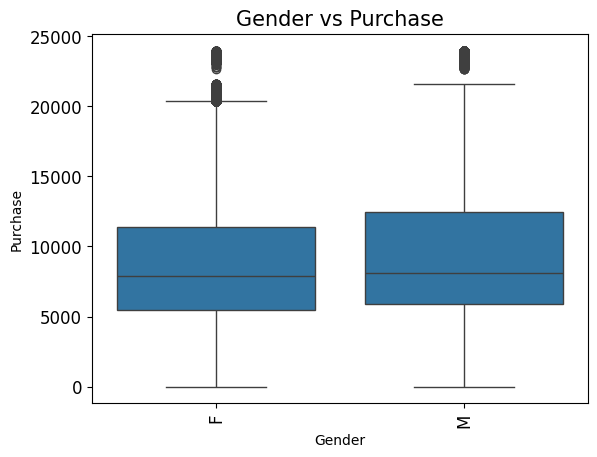

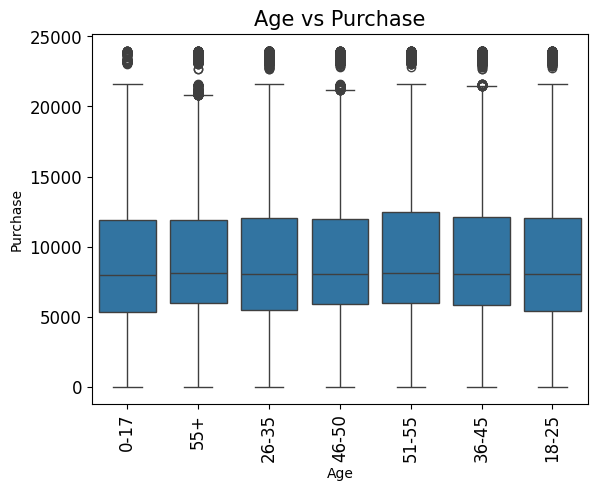

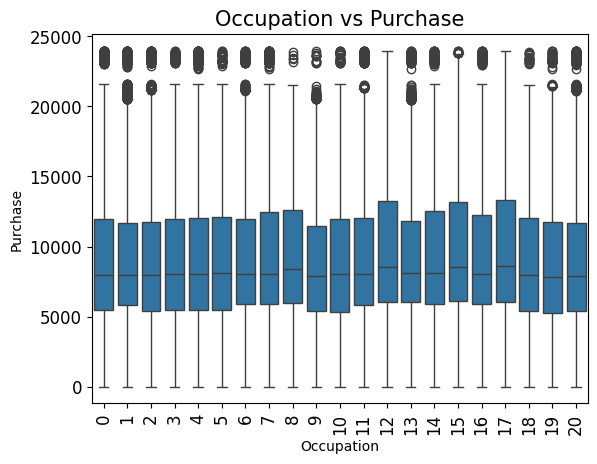

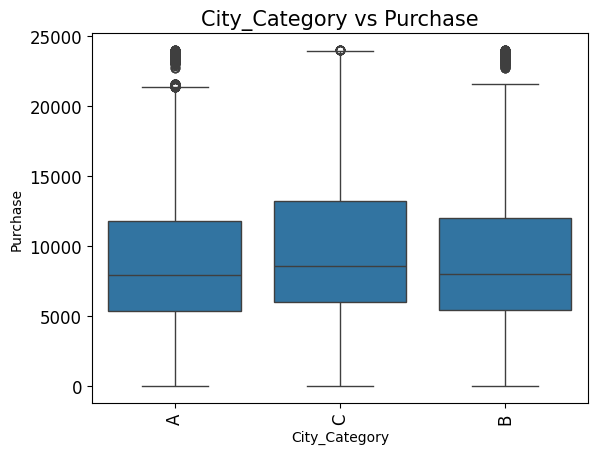

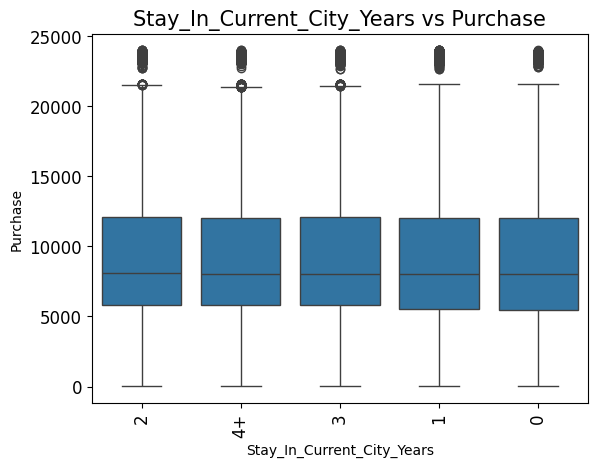

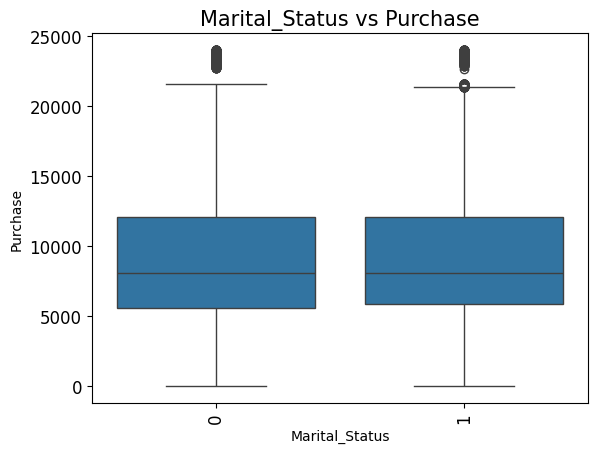

In [ ]:
col = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

for i in col:
  sns.boxplot(x=i, y='Purchase', data=data)
  plt.xticks(rotation=90,fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(f'{i} vs Purchase', fontsize=15)
  plt.show()

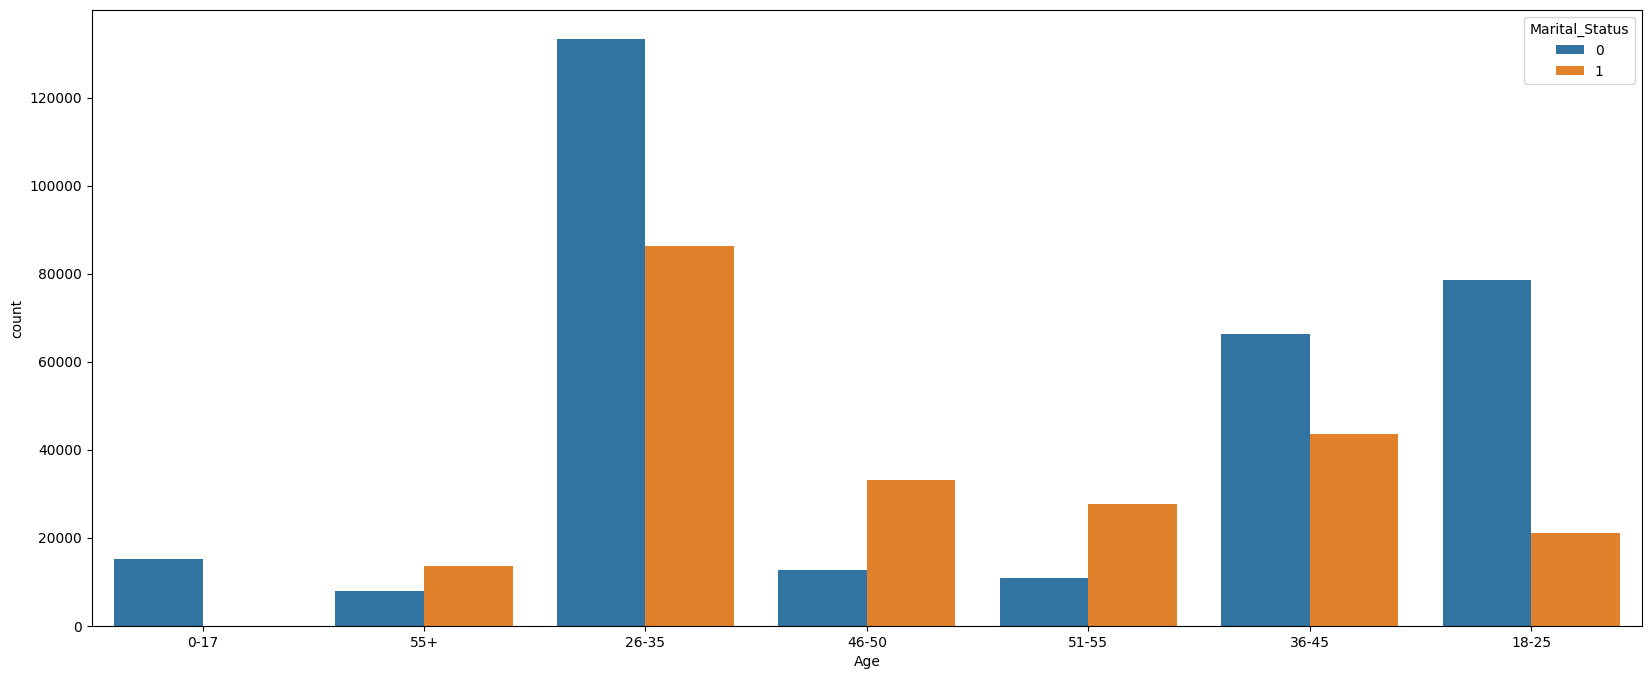

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Age',hue='Marital_Status')
plt.show()

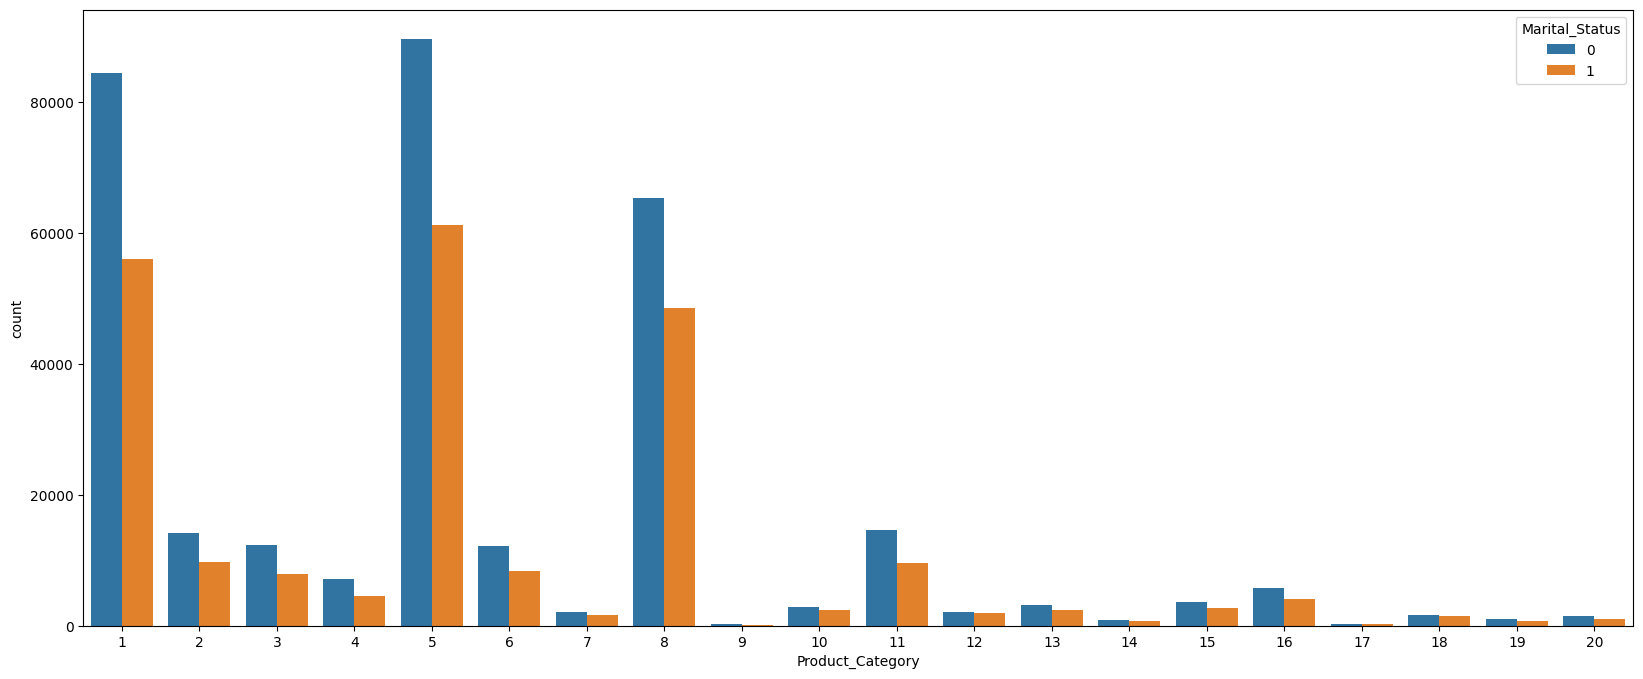

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Product_Category',hue='Marital_Status')
plt.show()

Most of the purchases are done by males

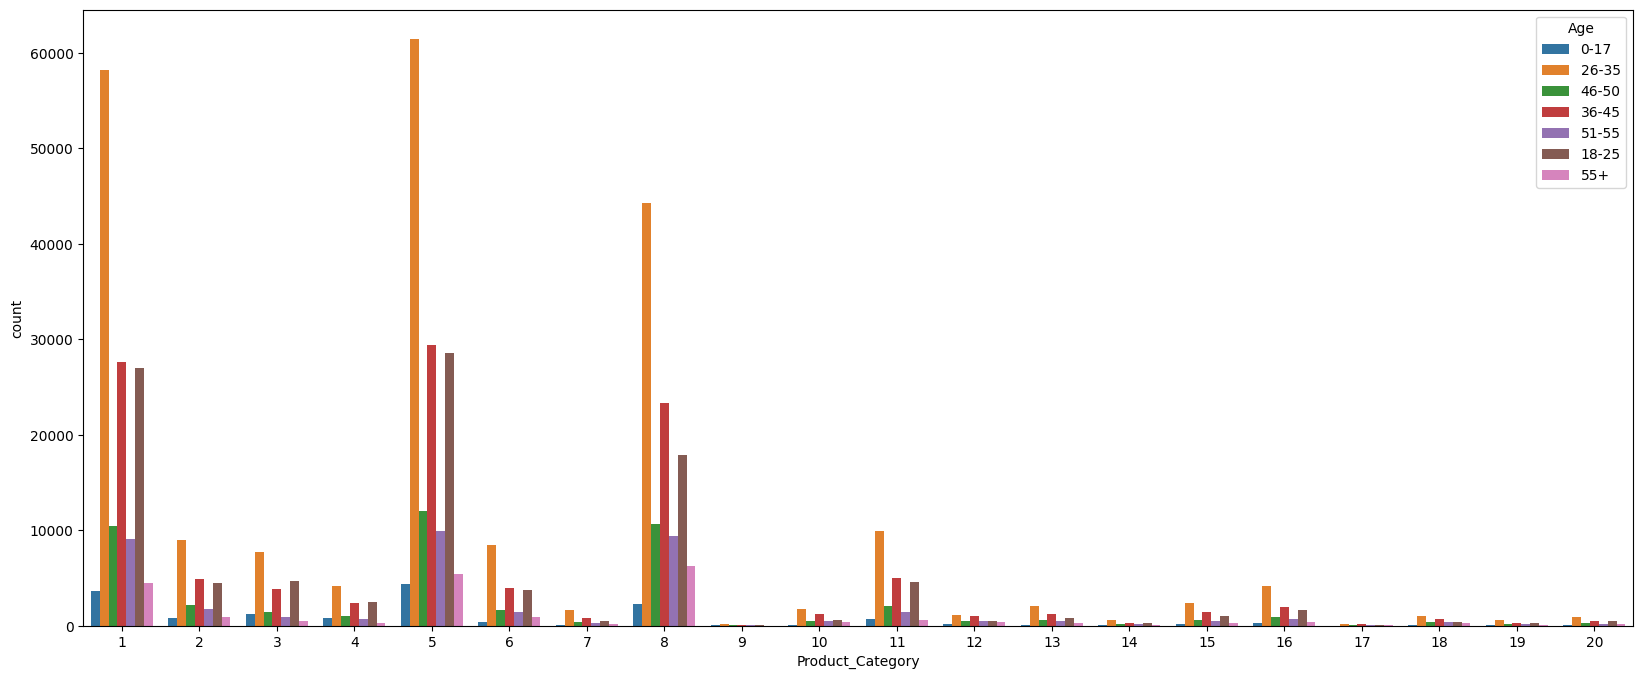

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Product_Category',hue='Age')
plt.show()

1, 5 and 8 were the most purchased product_category sold in Walmart.

In [ ]:
data[col].melt().groupby(['variable', 'value'])['value'].count()*100/len(data)

variable                    value
Age                         0-17      2.745479
                            18-25    18.117760
                            26-35    39.919974
                            36-45    19.999891
                            46-50     8.308246
                            51-55     6.999316
                            55+       3.909335
City_Category               A        26.854862
                            B        42.026259
                            C        31.118880
Gender                      F        24.689493
                            M        75.310507
Marital_Status              0        59.034701
                            1        40.965299
Occupation                  0        12.659889
                            1         8.621843
                            2         4.833584
                            3         3.208694
                            4        13.145284
                            5         2.213726
                            6         3.700452
                            7        10.750125
                            8         0.281056
                            9         1.143677
                            10        2.350618
                            11        2.106285
                            12        5.668208
                            13        1.404917
                            14        4.964659
                            15        2.211545
                            16        4.612339
                            17        7.279645
                            18        1.203851
                            19        1.538173
                            20        6.101427
Stay_In_Current_City_Years  0        13.525237
                            1        35.235825
                            2        18.513711
                            3        17.322404
                            4+       15.402823
Name: value, dtype: float64

#**Multi-variate Analysis**

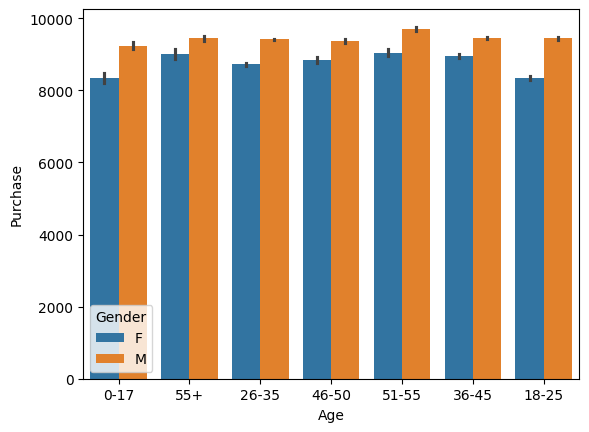

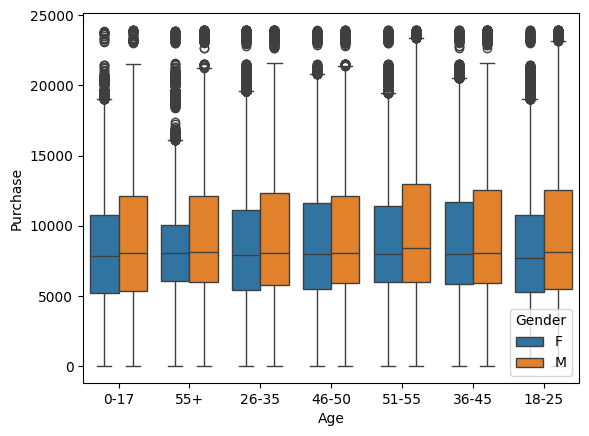

In [ ]:
sns.barplot(data=data, x='Age', y='Purchase',hue="Gender")
plt.show()


sns.boxplot(x='Age',y='Purchase',hue='Gender',data=data)
plt.show()

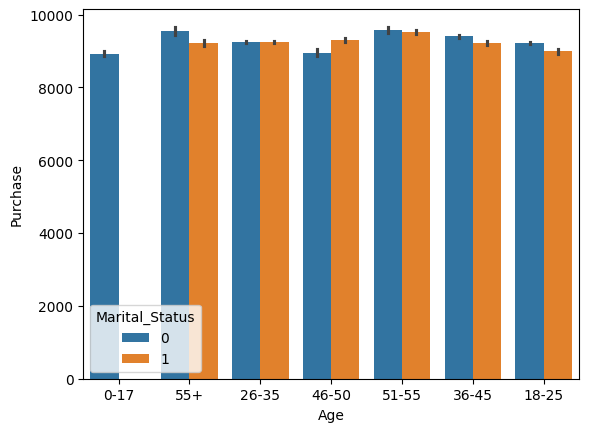

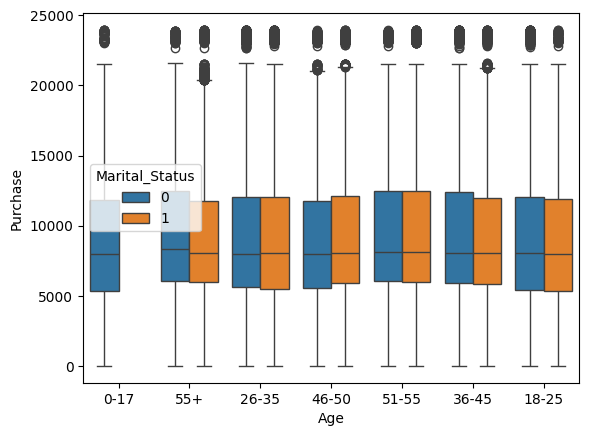

In [ ]:
sns.barplot(data=data, x='Age', y='Purchase',hue="Marital_Status")
plt.show()


sns.boxplot(x='Age',y='Purchase',hue='Marital_Status',data=data)
plt.show()

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


#**Distribution of Expenses based on Gender**

In [ ]:
data.groupby('Gender').describe()

User_ID                                                              \
           count          mean          std        min        25%        50%   
Gender                                                                         
F       135809.0  1.003130e+06  1786.630589  1000001.0  1001569.0  1003159.0   
M       414259.0  1.002996e+06  1706.493873  1000002.0  1001505.0  1003041.0   

                             Occupation           ... Product_Category        \
              75%        max      count     mean  ...              75%   max   
Gender                                            ...                          
F       1004765.0  1006039.0   135809.0  6.74054  ...              8.0  20.0   
M       1004411.0  1006040.0   414259.0  8.51475  ...              8.0  20.0   

        Purchase                                                           \
           count         mean          std   min     25%     50%      75%   
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

                 
            max  
Gender           
F       23959.0  
M       23961.0  

[2 rows x 40 columns]

In [ ]:
data.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
# Female Purchases
Female_data = data[data["Gender"]=="F"]
print("Female Purchase amount Mean:"+ str(Female_data["Purchase"].mean()))
print("Female Purchase amount SD:"+ str(Female_data["Purchase"].std()))

# Male Purchases
Male_data = data[data["Gender"]=="M"]
print("Male Purchase amount Mean:"+ str(Male_data["Purchase"].mean()))
print("Male Purchase amount SD:"+ str(Male_data["Purchase"].std()))

Female Purchase amount Mean:8734.565765155476
Female Purchase amount SD:4767.233289291444
Male Purchase amount Mean:9437.526040472265
Male Purchase amount SD:5092.186209777949


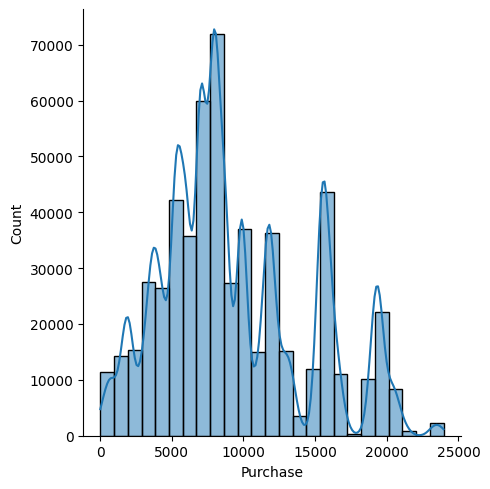

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, data=data )

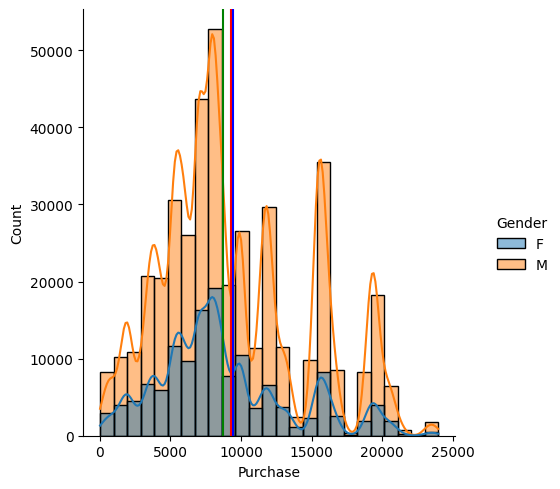

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Gender', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=data[data['Gender']=='F']['Purchase'].mean(), color='g')
plt.show()

Almost male and female means coincide with overall means.

Exploring data using CLT.

In [ ]:
data.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,69.0,8855.246377,5568.838694,480.0,5438.0,7985.0,10699.0,23365.0
M,231.0,9372.939394,5257.901485,12.0,5652.5,8008.0,12303.0,23775.0


In [ ]:
data.sample(00).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max


In [ ]:
female_sample_means_for_300=[Female_data.sample(300, replace=True)['Purchase'].mean() for i in range(1000)]

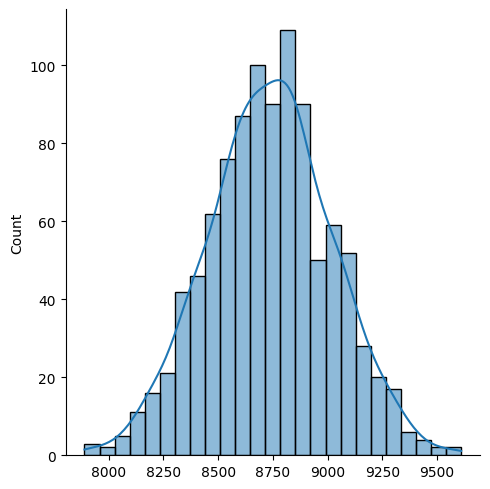

In [ ]:
sns.displot( bins=25, kde=True,  data=female_sample_means_for_300 )

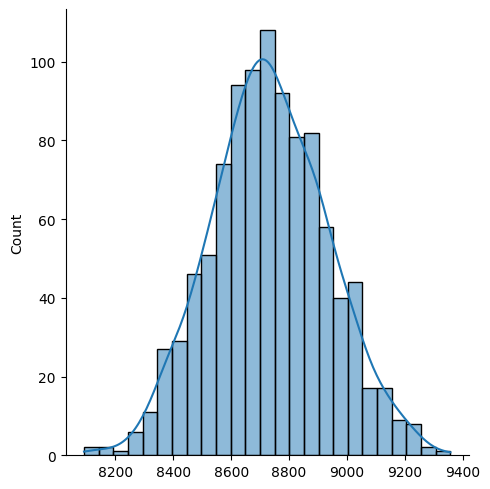

In [ ]:
female_sample_means_for_600=[Female_data.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=female_sample_means_for_600 )

In [ ]:
np.mean(female_sample_means_for_600)

8732.294033333334

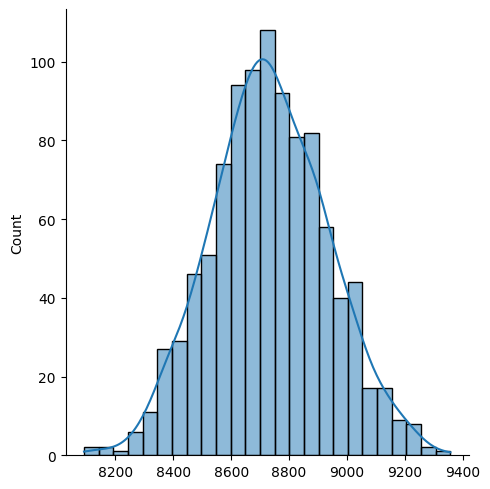

In [ ]:
male_sample_means_for_600=[Male_data.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=female_sample_means_for_600 )

In [ ]:
np.mean(male_sample_means_for_600)

9443.043593333334

In [ ]:
f_stderror=np.std(female_sample_means_for_600)/np.sqrt(1000)

In [ ]:
m_stderror=np.std(male_sample_means_for_600)/np.sqrt(1000)

In [ ]:
norm.interval(confidence=.95,loc=np.mean(female_sample_means_for_600),scale=f_stderror)

(8719.866794165076, 8744.72127250159)

In [ ]:
norm.interval(confidence=.95,loc=np.mean(male_sample_means_for_600),scale=m_stderror)

(9430.085888350462, 9456.001298316205)

The confidence interval of the sample average of male and female does not coincide.

#**Distribution of Expenses based on Maritial Status**

In [ ]:
data.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
# Single Purchases
Single_data = data[data["Marital_Status"]==0]
print("Single Purchase amount Mean:"+ str(Single_data["Purchase"].mean()))
print("Single Purchase amount SD:"+ str(Single_data["Purchase"].std()))

# Married Purchases
Married_data = data[data["Marital_Status"]==1]
print("Married Purchase amount Mean:"+ str(Married_data["Purchase"].mean()))
print("Married Purchase amount SD:"+ str(Married_data["Purchase"].std()))

Single Purchase amount Mean:9265.907618921507
Single Purchase amount SD:5027.347858674457
Married Purchase amount Mean:9261.174574082374
Married Purchase amount SD:5016.89737779313


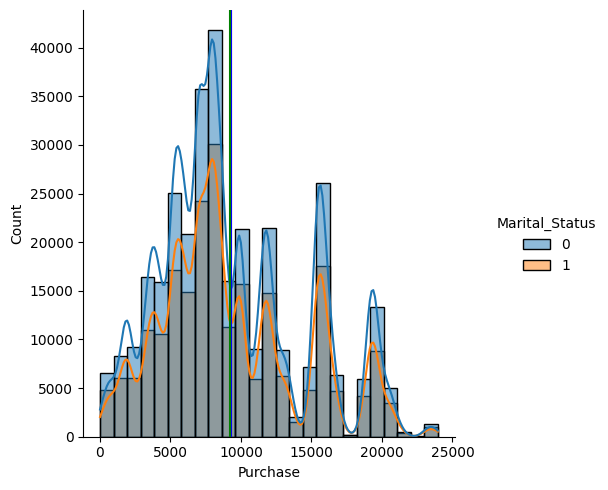

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Marital_Status', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Marital_Status']==0]['Purchase'].mean(), color='b')
plt.axvline(x=data[data['Marital_Status']==1]['Purchase'].mean(), color='g')
plt.show()

In [ ]:
data.sample(600).groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,346.0,9375.910405,4965.922135,191.0,5942.25,8615.5,11903.75,23809.0
1,254.0,9423.377953,4878.291733,566.0,5977.75,8138.0,12064.25,23262.0


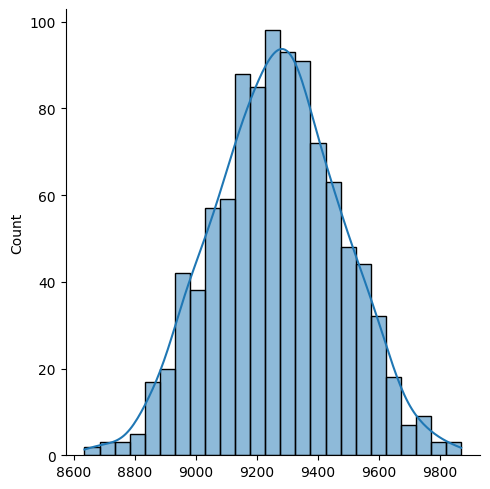

In [ ]:
single_sample_means_for_600=[Single_data.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=single_sample_means_for_600 )

In [ ]:
np.mean(single_sample_means_for_600)

9268.45226

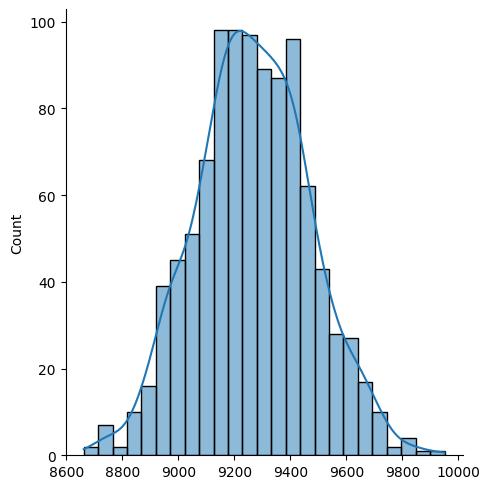

In [ ]:
married_sample_means_for_600=[Married_data.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

In [ ]:
np.mean(married_sample_means_for_600)

9266.183008333335

In [ ]:
s_stderror=np.std(single_sample_means_for_600)/np.sqrt(1000)

In [ ]:
m_stderror=np.std(married_sample_means_for_600)/np.sqrt(1000)

In [ ]:
norm.interval(confidence=.95,loc=np.mean(single_sample_means_for_600),scale=s_stderror)

(9255.62389375113, 9281.28062624887)

In [ ]:
norm.interval(confidence=.95,loc=np.mean(married_sample_means_for_600),scale=m_stderror)

(9253.660797812818, 9278.705218853853)

Average of both sample means taking Maritial Status as a account coincides each other.

#**Distribution of Expenses based on Age**

In [ ]:
data.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
# Single Purchases
Age_grp1 = data[data["Age"]=='0-17']
print("Age_grp1 Purchase amount Mean:"+ str(Age_grp1["Purchase"].mean()))
print("Age_grp1 Purchase amount SD:"+ str(Age_grp1["Purchase"].std()))

# Married Purchases
Age_grp2 = data[data["Age"]=='18-25']
print("Age_grp2 Purchase amount Mean:"+ str(Age_grp2["Purchase"].mean()))
print("Age_grp2 Purchase amount SD:"+ str(Age_grp2["Purchase"].std()))

# Married Purchases
Age_grp3 = data[data["Age"]=='26-35']
print("Age_grp3 Purchase amount Mean:"+ str(Age_grp3["Purchase"].mean()))
print("Age_grp3 Purchase amount SD:"+ str(Age_grp3["Purchase"].std()))

# Married Purchases
Age_grp4 = data[data["Age"]=='36-45']
print("Age_grp4 Purchase amount Mean:"+ str(Age_grp4["Purchase"].mean()))
print("Age_grp4 Purchase amount SD:"+ str(Age_grp4["Purchase"].std()))

# Married Purchases
Age_grp5 = data[data["Age"]=='46-50']
print("Age_grp5 Purchase amount Mean:"+ str(Age_grp5["Purchase"].mean()))
print("Age_grp5 Purchase amount SD:"+ str(Age_grp5["Purchase"].std()))

# Married Purchases
Age_grp6 = data[data["Age"]=='51-55']
print("Age_grp6 Purchase amount Mean:"+ str(Age_grp6["Purchase"].mean()))
print("Age_grp6 Purchase amount SD:"+ str(Age_grp6["Purchase"].std()))

# Married Purchases
Age_grp7 = data[data["Age"]=='55+']
print("Age_grp7 Purchase amount Mean:"+ str(Age_grp7["Purchase"].mean()))
print("Age_grp7 Purchase amount SD:"+ str(Age_grp7["Purchase"].std()))

Age_grp1 Purchase amount Mean:8933.464640444974
Age_grp1 Purchase amount SD:5111.11404600277
Age_grp2 Purchase amount Mean:9169.663606261289
Age_grp2 Purchase amount SD:5034.321997176577
Age_grp3 Purchase amount Mean:9252.690632869888
Age_grp3 Purchase amount SD:5010.527303002927
Age_grp4 Purchase amount Mean:9331.350694917874
Age_grp4 Purchase amount SD:5022.923879204652
Age_grp5 Purchase amount Mean:9208.625697468327
Age_grp5 Purchase amount SD:4967.216367142921
Age_grp6 Purchase amount Mean:9534.808030960236
Age_grp6 Purchase amount SD:5087.368079602116
Age_grp7 Purchase amount Mean:9336.280459449405
Age_grp7 Purchase amount SD:5011.493995603418


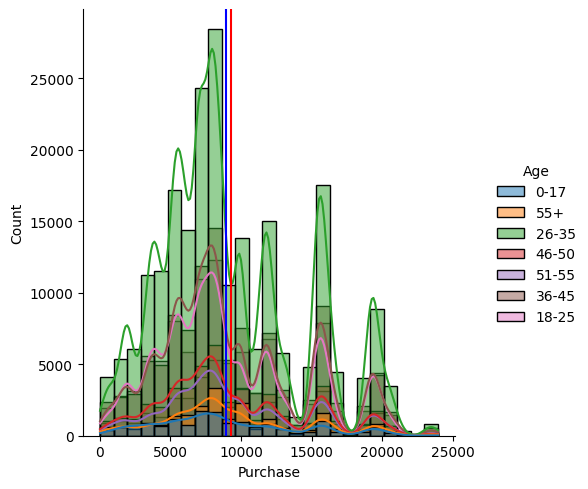

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Age', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Age']=='0-17']['Purchase'].mean(), color='b')
plt.show()

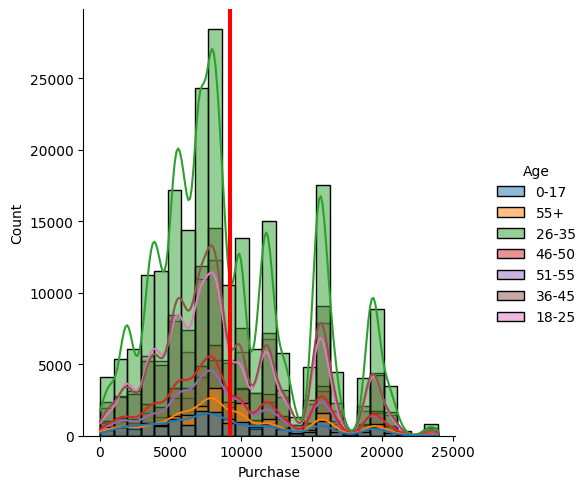

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Age', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Age']=='18-25']['Purchase'].mean(), color='r')
plt.show()

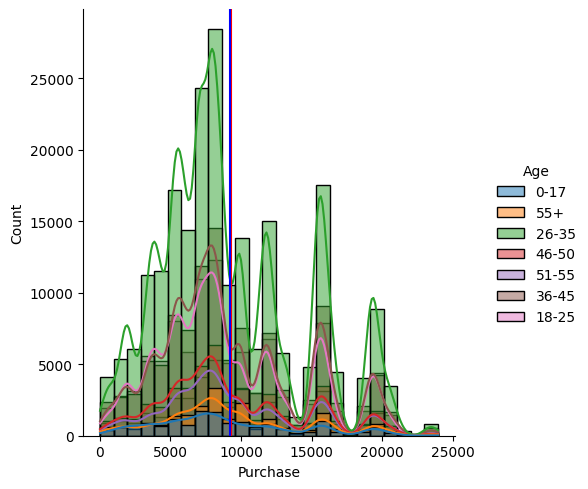

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Age', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Age']=='26-35']['Purchase'].mean(), color='b')
plt.show()

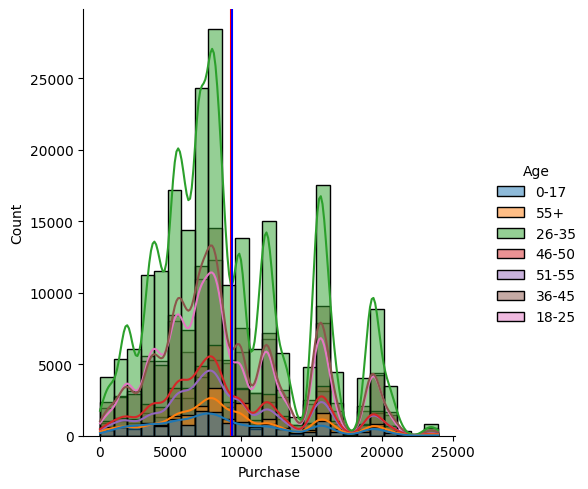

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Age', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Age']=='36-45']['Purchase'].mean(), color='b')
plt.show()

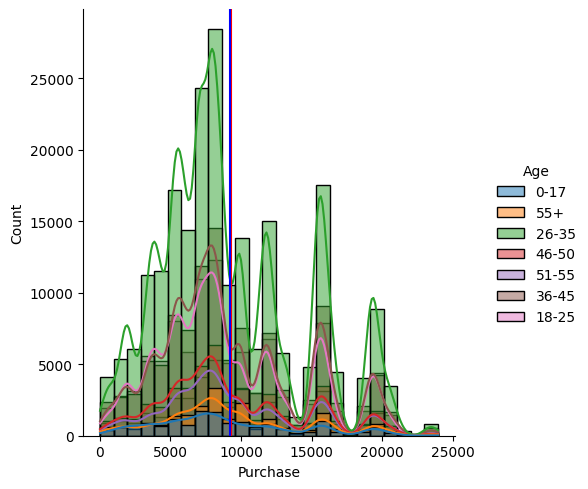

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Age', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Age']=='46-50']['Purchase'].mean(), color='b')
plt.show()

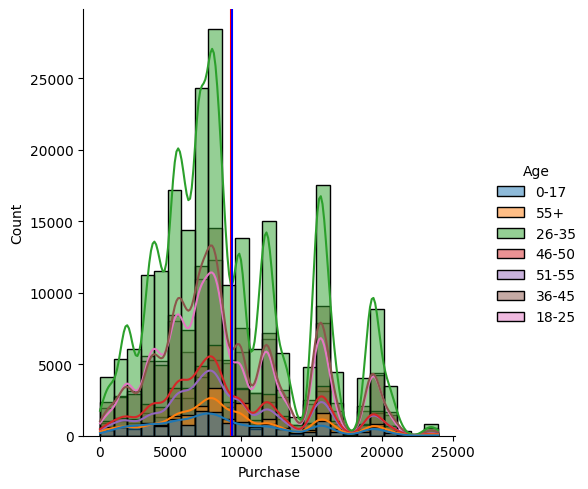

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True, hue='Age', data=data )
plt.axvline(x=data['Purchase'].mean(), color='r')
plt.axvline(x=data[data['Age']=='55+']['Purchase'].mean(), color='b')
plt.show()

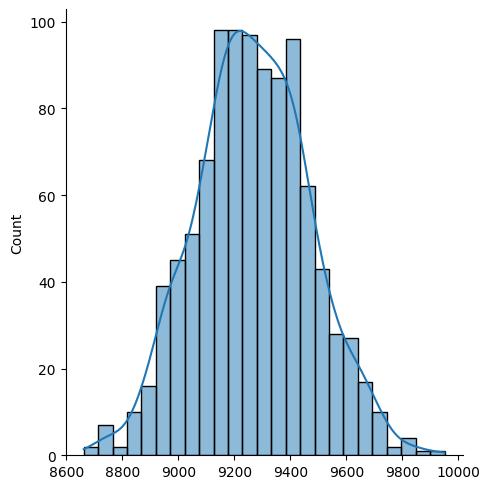

In [ ]:
Age_grp1_means_for_600=[Age_grp1.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

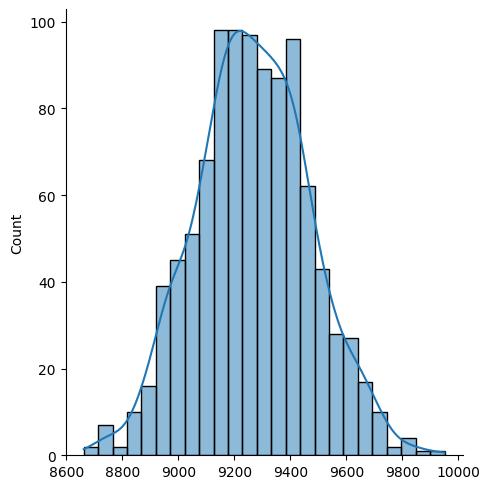

In [ ]:
Age_grp2_means_for_600=[Age_grp2.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

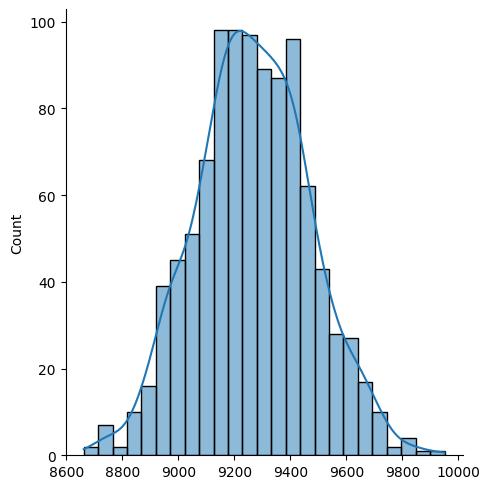

In [ ]:
Age_grp3_means_for_600=[Age_grp3.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

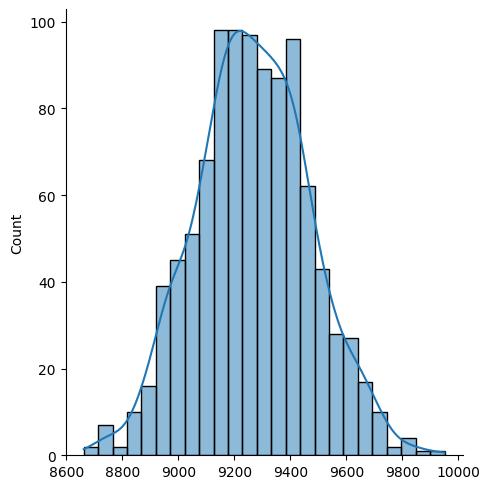

In [ ]:
Age_grp4_means_for_600=[Age_grp4.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

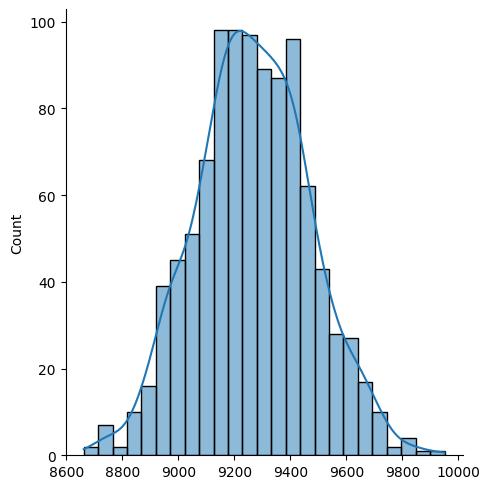

In [ ]:
Age_grp5_means_for_600=[Age_grp5.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

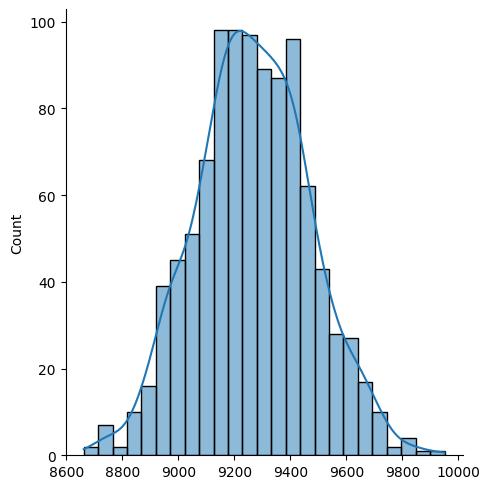

In [ ]:
Age_grp6_means_for_600=[Age_grp6.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

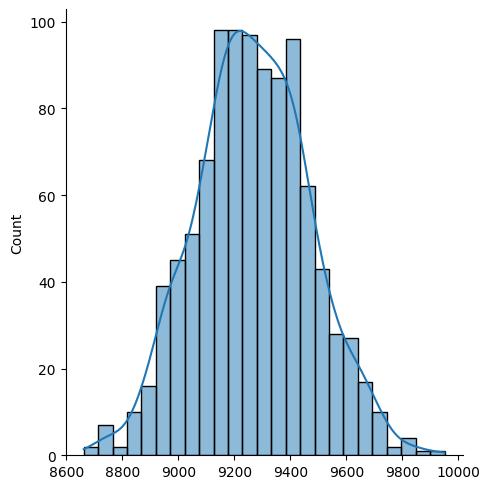

In [ ]:
Age_grp7_means_for_600=[Age_grp7.sample(600, replace=True)['Purchase'].mean() for i in range(1000)]
sns.displot( bins=25, kde=True,  data=married_sample_means_for_600 )

In [ ]:
stderror=np.std(Age_grp1_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp1_means_for_600),scale=stderror)

(8928.614847272833, 8953.966019393834)

In [ ]:
stderror=np.std(Age_grp2_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp2_means_for_600),scale=stderror)

(9156.78164961004, 9182.14735372329)

In [ ]:
stderror=np.std(Age_grp3_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp3_means_for_600),scale=stderror)

(9233.598655900663, 9259.31054743267)

In [ ]:
stderror=np.std(Age_grp4_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp4_means_for_600),scale=stderror)

(9320.67375778804, 9345.666215545292)

In [ ]:
stderror=np.std(Age_grp5_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp5_means_for_600),scale=stderror)

(9185.383008811807, 9211.605357854862)

In [ ]:
stderror=np.std(Age_grp6_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp6_means_for_600),scale=stderror)

(9535.128122093833, 9560.5986512395)

In [ ]:
stderror=np.std(Age_grp7_means_for_600)/np.sqrt(1000)
norm.interval(confidence=.95,loc=np.mean(Age_grp7_means_for_600),scale=stderror)

(9336.467516243125, 9361.265157090207)

Therefore from the assumptions the means vary across different age groups.

#**Actionable Insights**

From the analysis the age group between 26-35 purchased more when compared to others groups. it is recommended to concentrate more promote to this age group.


Purchase amount of male were more when compared to female whereas female has some high purchase amounts which are outliers.

It has been observed that those who are married and age group between 18-45 purchased more when compared to married in that group.

Product Category of 1, 5, 8 were the most sold products.

The distribution between genders and the distribution between age groups varies.

The distribution between marital status coincides with each other.

The City B contibuted more followed C  and A.

#**Recommendations**

Therefore we can recommend to increase the product category of 1, 5 and 8 products inorder to increase more sales. Similarly it is also advised to concentrate on other product categories.

It is advised to concentrate towards the age group between 18-45 has they contibute almost 80% of sales.
